# 데이터전처리

## 데이터 샘플링
- 데이터 분석을 진행할 때, 전체 데이터를 모두 활용하는 것은 수많은 시간과 비용이 들 수 있다.
- 본 장에서는 데이터 샘플링의 방법과 python을 활용한 표본 추출에 대해 학습한다.

### 통계
- 통계란 특정 집단을 대상으로 수행한 조사나 실험을 통해 나온 결과에 대한 요약된 형태의 표현이다.
- 조사 또는 실험을 통해 데이터를 확보하며, 조사 대상에 따라 총조사와 표본조사로 구분한다.

### 통계자료의 획득 방법
#### 가. 총 조사/전수조사
- 총 조사란 대상 집단 모두를 조사하는 방법이며, 특별한 경우를 제외하고는 사용되지 않는다.

#### 나. 표본조사
- 모집단(population): 조사하고자 하는 대상 집단 전체
- 원소(element): 모집단을 구성하는 개체
- 표본(sample): 조사하기 위해 추출한 모집단의 일부원소
- 모수(parameter): 표본 관측에 의해 구하고자 하는 모집단에 대한 정보
- 모집단의 정의, 표본의 크기, 조사방법, 조사기간, 표본추출방법을 명확하게 정의해야하 한다.

### 4.1.3 표본 추출 방법
- 표본조사에서 중요한 점은 모집단을 대표할 수 있는 표본의 추출이며, 표본 추출 방법에 따라 분석 결과의 해석은 큰 차이가 발생한다.

#### 가. 단순 임의 추출법
- 각 개체에 번호를 부여하여 랜덤하게 n개를 추출하는 방법으로 모든 개체는 선택될 확률이 동일하다.
- 복원, 비복원 추출로 나누어진다.

#### 나. 계통추출법
- 랜덤하게 <정렬된 표본>에서 시간 혹은 공간적으로 일정한 간격을 두고 표본을 추출하는 방법이다.
- 단순랜덤추출법의 변형된 방식으로 번호를 부여한 샘플을 나열하여 K개씩 n개의 구간으로 나누고 첫 구간에서 하나의 임의로 선택한 후에 K개씩 띄어서 표본을 선택한다. 즉 임의의 위치에서 매 K번째 항목을 추출하는 방법이다.

#### 다. 집락추출법
- 군집을 구분하고 특정 군집을 먼저 선택한 후 해당 군집에서만 표본을 추출하는 방법이다.

#### 라. 층화추출법
- 모집단이 이질적인 몇 개의 계층으로 이루어져 있을 때 모든 계층으로부터 원소를 임의로 추출하여 각 계층을 고루 대표할 수 있도록 랜덤하게 표본을 추출하는 방법이다.

### Python을 이용한 표본 추출

#### 단순 임의 추출
- 일반적으로 데이터를 training data와 rest data로 분할할 때 가장 많이 사용하는 표본추출 방법이다.

#### 함수 사용법: DataFrame.sample(frac=0.7, random_state=2000)
- n: 추출할 표본 개수
- frac: 추출할 표본 크기 비율
- replace: boolean, True이면 복원추출, False이면 비복원 추출
- random_state: seed

--------

**[예제]** iris 데이터로 분석을 진행하기 위해 전체 데이터의 7:3 비율로 training data와 test data를 추출한 뒤 새로운 변수에 저장해보자 (데이터 추출 방법은 단순 임의 추출을 이용한다)

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('./data/iris.csv')
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
training = iris.sample(frac=0.7, random_state=2000)
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 19 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  105 non-null    float64
 1   sepal width   105 non-null    float64
 2   petal length  105 non-null    float64
 3   petal width   105 non-null    float64
 4   target        105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [5]:
iris['target'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: target, dtype: int64

In [6]:
training['target'].value_counts()

Iris-virginica     38
Iris-versicolor    35
Iris-setosa        32
Name: target, dtype: int64

In [7]:
training = iris.sample(frac=0.7, random_state=52)
test = iris.sample(frac=0.3, random_state=48)

In [8]:
training.index

Int64Index([ 43,  37, 143, 145, 107,  52,  60,  41, 122, 131,
            ...
            112, 141,  75, 132,  12,  59,  46, 128, 148,  10],
           dtype='int64', length=105)

In [9]:
len(iris)

150

In [10]:
len(training)

105

In [11]:
len(test)

45

In [12]:
training[training.index.isin(test.index)]

,sepal length,sepal width,petal length,petal width,target
41,4.5,2.3,1.3,0.3,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa
72,6.3,2.5,4.9,1.5,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor


#### 층화 임의 추출
- 특정 데이터가 여성 계층 70%, 남성 계층 30%로 구성되어 있다고 가정해보자. 각 계층을 고루 대표할 수 있도록 표본을 추출하기 위해서는 여성과 남성 집단에 대해 0.7:0.3의 비율로 데이터를 뽑아야 한다. 이처럼 여성과 남성이라는 계층별로 표본을 추출하는 것을 층화 임의 추출이라고 한다.


**from sklearn.model_selection import train_test_split**

함수 사용법: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=변수, random_state=1004)

- X: 데이터 테이블
- test_size: 테스트 사이즈 비율
- shuffle : True이면 무작위 추출, False이면 체계적 추출
- random_state : 난수

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(iris, test_size=0.3, shuffle=True, stratify=iris['target'], random_state=1004)

In [15]:
iris['target'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: target, dtype: int64

In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
X_train

,sepal length,sepal width,petal length,petal width,target
113,5.7,2.5,5.0,2.0,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
...,...,...,...,...,...
82,5.8,2.7,3.9,1.2,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor


In [18]:
X_train['target'].value_counts()

Iris-virginica     35
Iris-versicolor    35
Iris-setosa        35
Name: target, dtype: int64

In [19]:
X_test.index.sort_values()

Int64Index([  2,   5,   7,   8,  11,  12,  14,  20,  21,  23,  26,  31,  40,
             47,  49,  57,  63,  69,  73,  76,  77,  79,  83,  84,  91,  92,
             93,  94,  95,  97, 104, 106, 110, 112, 114, 116, 120, 122, 124,
            127, 131, 132, 135, 141, 145],
           dtype='int64')

## 언더 샘플링 & 오버 샘플링

### 언더 샘플링
- 다수 클래스의 샘플은 소수 클래스와 비교할 때 분포 비율과 일치하도록 무작위로 제거함.
- 2개의 클래스의 비율을 맞추기 위해 귀중한 정보를 잃어버리고 편향될 수 있기 때문에 일반적으로 선호되지 않음

### 오버 샘플링
- 소수 클래스의 샘플을 증가시켜 마이너 클래스와 메이저 클래스의 샘플 크기를 동일하게 만드는 기법
- 랜덤 오버 샘플링(소수 샘플 복제)은 동일한 정보를 복사하여 오버피팅을 유발할 수 있음

### SMOTE(Synthetic Minority Over-sampling Technique)
- 소수 클래스의 기존 샘플을 사용하여 새로운 합성 관찰을 생성하는 오버 샘플링 기법 소수 클래스에 대한 선형 보간법으로 가상 훈련 기록을 생성.
- 합성 훈련 기록은 소수 클래스의 각 예에 대해 k-최근접 이웃 중 하나 이상을 무작위로 선택하여 생성.
- 오버 샘플링 과정을 거친 후 데이터를 재구성하고 처리된 데이터에 대해 여러 분류 모델을 적용할 수 있음
- 데이터의 특성에 따라 다르겠지만, 빅데이터 분석을 위해서는 많은 데이터 확보가 효과적이므로 오버 샘플링 기법을 적용하는 것이 좋음.
- 기존의 데이터가 적은 새로운 사례의 데이터에서 사용하기 어려움.

In [20]:
df_t = pd.read_csv('./data/titanic.csv')

In [21]:
df_t['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [22]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [23]:
#생존자가 적으므로 생존자 1을 오버 샘플링해보자

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
#!conda install -c conda-forge imbalanced-learn -y

In [26]:
!pip install -U imbalanced-learn

In [27]:
df_t = df_t.dropna()

In [28]:
X = df_t[['age','sibsp','parch','fare']]
y = df_t['survived']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, shuffle=True, stratify=y, random_state=1004)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)

In [31]:
X_train.shape

(498, 4)

In [32]:
y_train.value_counts()

0    297
1    201
Name: survived, dtype: int64

In [33]:
# 모델설정
sm = SMOTE(k_neighbors = 5)

# train 데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, the shape of train_X: (594, 4)
After OverSampling, the shape of train_y: (594,)
After OverSampling, counts of label '1': 297
After OverSampling, counts of label '0': 297


## 데이터 표준화, 정규화
sklearn에서는 다양한 종류의 스케일러를 제공함

- 데이터 변환이 필요한 이유
- 데이터의 단위와 평균과 표준편차가 모두 다르다면, 우리가 학습시키는 머신이 그 단위를 인지하지 못함
- 즉, 우리는 머신에 학습을 시킬 때, 유사한 단위를 맞춰 줘야 합니다.
- 또한 통계는 표본집단의 평균과 분산으로 모집단의 분산을 설명하는 학문인데, 차원마다 범위가 다르면, 스케일이 큰 집단의 영향을 많이 받습니다. 그렇기 때문에 차원의 스케일을 맞춰줄 필요가 있습니다.

In [34]:
import pandas as pd
import numpy as np

### StandardScaler 표준화
- 기본 스케일, 평균과 표준편차 사용
    z = ( x - u ) / s
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(data) : 모델 학습
    
    변환된 배열의 전체 평균은 0, 분산은 1

In [35]:
from sklearn.preprocessing import StandardScaler
data = [[0,0],[0,0],[1,1],[1,1]]
scaler = StandardScaler()

print(scaler.fit(data))

StandardScaler()


In [36]:
print(scaler.mean_)

[0.5 0.5]


In [37]:
scaler.var_

array([0.25, 0.25])

In [38]:
scaler.mean_

array([0.5, 0.5])

In [39]:
print(scaler.transform(data))
# (x-u)/s = z 값의 배열

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [40]:
print(scaler.transform([[2,2]]))

[[3. 3.]]


In [41]:
import pandas as pd
df_iris = pd.read_csv('./data/iris.csv')
df_iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(df_iris.iloc[:,:4])

StandardScaler()

In [44]:
scaler.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [45]:
scaler.var_

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

In [46]:
scaler.transform(df_iris.iloc[:,:4])[:20]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ],
       [-0.53717756,  1.49486315, -1.2844067 , -1.31297673],
       [-1.26418478,  0.80065426, -1.227541  , -1.31297673],
       [-1.26418478, -0.1249576 , -1.3412724 , -1.4444497 ],
       [-1.87002413, -0.1249576 , -1.51186952, -1.4444497 ],
       [-0.05250608,  2.18907205, -1.45500381, -1.31297673],
       [-0.17367395,  3.11468391, -1.2844067 , -1.05003079],
       [-0.53717756,  1.

In [47]:
pd.DataFrame(scaler.transform(df_iris.iloc[:,:4]), columns = [df_iris.columns[:4]+"_scaled"])

,sepal length_scaled,sepal width_scaled,petal length_scaled,petal width_scaled
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


--------

### MinMaxScaler 정규화
- 최대 / 최소값이 각각 1,0이 되도록 스케일링
    X_std = ( X - X.min(axis = 0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    
    sklearn.preprocessing.MinMaxScaler(feature_range=(0,1), \*, copy=True, clip=False)

In [48]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

print(scaler.data_max_)

MinMaxScaler()
[ 1. 18.]


In [49]:
scaler.data_min_

array([-1.,  2.])

In [50]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [51]:
scaler = MinMaxScaler()
scaler.fit(df_iris.iloc[:,:4])
scaler.transform(df_iris.iloc[:,:4])[:20]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [52]:
df_iris.iloc[:,:4]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
print(scaler.transform([[2,2,40,450]]))

[[ -0.63888889   0.           6.61016949 187.45833333]]


/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
scaler.fit_transform(df_iris.iloc[:,:4])[:20]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### MaxAbsScaler
- 최대절대값과 0이 각각 1, -1이 되도록 스케일링
    
    class sklearn.preprocessing.MaxAbsScaler(\*, copy=True)

In [55]:
from sklearn.preprocessing import MaxAbsScaler
X = [[1.,-1,2.],
    [2.,0,0.],
    [0.,1.,-1.]]
transformer = MaxAbsScaler().fit(X)
transformer
MaxAbsScaler()
transformer.transform(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

### RobustScaler
- 중앙값 (median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

    sklearn.preprocessing import RobustScaler

In [56]:
from sklearn.preprocessing import RobustScaler
X = [[1.,-2.,2.],
    [-2.,1.,3.],
    [4.,1.,-2.]]
transformer = RobustScaler().fit(X)
transformer

RobustScaler()

In [57]:
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

## 결측치 처리하기

### 결측치 인식
- dataframe.isna()
    데이터의 요소가 결측치일 경우 TRUE 반환하고, 그렇지 않을 경우 FALSE 반환
    .isna() = .isnull()
- 변수별로 데이터의 각 행에 결측치가 있는지 확인 후 반환
- 합을 구해 결측치의 개수를 쉽게 파악 가능

#### 결측치가 있는/없는 행 확인
- na가 있는 행들 저장 : df_row_with_na = df[df.isna().any(axis=1)]
- na가 없는 행들 저장 : df_row_without_na = df.dorpna()

**[예제 1]**
airquality 데이터의 Ozone 변수에 대한 결측치 여부를 파악하고, 만약 결측치가 있다면 그 개수를 확인해라

In [58]:
import pandas as pd
import numpy as np
air = pd.read_csv("./data/airquality.csv")
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [59]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [60]:
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [61]:
# Ozone 변수에 존재하는 na의 개수 산출
air[air["Ozone"].isna()]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
9,NaN,194.0,8.6,69,5,10
24,NaN,66.0,16.6,57,5,25
25,NaN,266.0,14.9,58,5,26
26,NaN,NaN,8.0,57,5,27
31,NaN,286.0,8.6,78,6,1
32,NaN,287.0,9.7,74,6,2
33,NaN,242.0,16.1,67,6,3
34,NaN,186.0,9.2,84,6,4
35,NaN,220.0,8.6,85,6,5


In [62]:
# Ozone 변수에서 na가 아닌 값과 na 값의 개수 비교
air["Ozone"].isna().value_counts()

False    116
True      37
Name: Ozone, dtype: int64

**[예제 2]**
airquality 데이터에서 결측치가 하나라도 존재하는 행들을 air_na 변수에 저장하고

결측치를 하나도 가지지 않는 행들을 air_com 변수에 저장하기

In [63]:
air.isna().any(axis=1)

0      False
1      False
2      False
3      False
4       True
       ...  
148    False
149     True
150    False
151    False
152    False
Length: 153, dtype: bool

In [64]:
air_na = air[air.isna().any(axis=1)]
air_na.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
9,NaN,194.0,8.6,69,5,10
10,7.0,NaN,6.9,74,5,11
24,NaN,66.0,16.6,57,5,25
25,NaN,266.0,14.9,58,5,26
26,NaN,NaN,8.0,57,5,27
31,NaN,286.0,8.6,78,6,1
32,NaN,287.0,9.7,74,6,2
33,NaN,242.0,16.1,67,6,3


In [65]:
air_com = air.dropna()
air_com

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


### 결측치 처리

#### 결측치 대치법 이해
가. 단순 대치법
- complete analysis : 결측값이 존재하는 행 삭제
- 평균 대치법 : 관측 또는 실험을 통해 얻어진 데이터의 평균으로 결측치 대치
- 단순확률 대치법 : Hot-dect 방법, nearest neighbor 방법 등
나. 다중 대치법
- 단순 대치법을 m번 수행해 m개의 가상적 완전 자료를 만듦
- [대치] - [분석] - [결합] 단계

#### 결측치 제거
- 결측치가 존재하는 행/열 제거

|함수|설명|
|---|---|
|데이터명.dropna()|행 기준으로 결측치가 있는 행은 모두 삭제|
|데이터명.dropna(axis=1)|열 기준으로 결측치가 있는 열은 모두 삭제|
|데이터명.dropna(how="all")|행 전체가 결측값인 행만 삭제|
|데이터명.dropna(thresh=2)|결측치의 갯수 수치를 지정해서 임계치를 넘어가면 삭제|
|데이터명.dropna(subset=["컬럼명1","컬럼명2"])|특정 컬럼 내의 결측치만 삭제|
|데이터명.dropna(inplace=True)|결측치 제거한 상태를 바로 적용|

#### 결측치 대치법
- 해당 변수 값들을 특정 값으로 대치함


|함수|설명|
|---|---|
|데이터명.fillna(0)|결측값을 0으로 대체|
|데이터명.fillna(method="ffill" 또는 "pad")|결측값을 앞방향으로 채워나감|
|데이터명.fillna(method="bfill" 또는 "backfill"|결측값을 뒷방향으로 채워나감|
|데이터명.fillna(method="ffill", limit=1)|앞/뒤 방향으로 결측값을 채우는 횟수를 1번으로 제한|
|데이터명.fillna(데이터명.mean())|결측값을 변수별 평균으로 대체|
|데이터명.dropna(inplace=True)|결측치 제거한 상태를 바로 적용|
|데이터명.fillna(데이터명.median())|결측치를 중앙값으로 대체|
|데이터명["컬럼명"].decribe()["top"]|법주형 변수 열의 최빈값으로 결측치를 대체|

**[예제 1]**
airquality의 Ozone 변수값이 존재하지 않는 경우, Ozone 변수 값들의 평균으로 대치하기

In [66]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [67]:
air["Ozone"].fillna(air["Ozone"].mean(), inplace=True)
air["Ozone"]

0      41.00000
1      36.00000
2      12.00000
3      18.00000
4      42.12931
         ...   
148    30.00000
149    42.12931
150    14.00000
151    18.00000
152    20.00000
Name: Ozone, Length: 153, dtype: float64

In [68]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


#### 사이킷런을 활용한 결측치 대치 - KNN

In [69]:
from sklearn.impute import KNNImputer

In [70]:
air = pd.read_csv("./data/airquality.csv")
imputer = KNNImputer(n_neighbors = 2)
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [71]:
air_filled = imputer.fit_transform(air)
air_filled[:20]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [ 18.5, 206. ,  14.3,  56. ,   5. ,   5. ],
       [ 28. , 270.5,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [ 17.5, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. , 109. ,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [72]:
pre_air = pd.DataFrame(air_filled, columns = air.columns)
pre_air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,18.5,206.0,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9.0,26.0
149,24.5,145.0,13.2,77.0,9.0,27.0
150,14.0,191.0,14.3,75.0,9.0,28.0
151,18.0,131.0,8.0,76.0,9.0,29.0


In [73]:
pre_air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 이상치 인식

#### 사분위수
- 데이터명.describe()
    - 결측치가 아닌 데이터 행의 개수
    - 평균/표준편차
    - 최소/최댓값
    - Q1, Q2, Q3 나타내줌
- IQR을 이용한 이상치 탐색: 함수 생성

<AxesSubplot:xlabel='Ozone'>

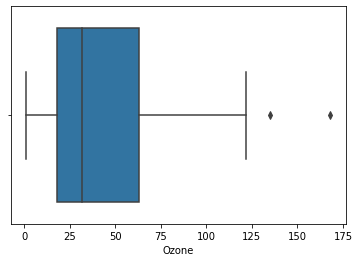

In [74]:
# Ozone 변수에서 이상치를 박스플롯으로 확인
import seaborn as sns

sns.boxplot(x="Ozone", data=air)

In [75]:
# IQR 을 이용한 이상치 탐색 함수

def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    IQR_weight = IQR * weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

In [76]:
# IQR로 이상치를 찾아 인덱스 저장되어 있음

out_index = detect_outliers(df=air, column = "Ozone")
out_index

Int64Index([61, 116], dtype='int64')

In [77]:
air.loc[out_index, "Outlier"] = True
air[air["Outlier"] == True]

,Ozone,Solar.R,Wind,Temp,Month,Day,Outlier
61,135.0,269.0,4.1,84,7,1,True
116,168.0,238.0,3.4,81,8,25,True


In [78]:
# outlier 대체 (중위 값 혹은 평균값으로)
air.loc[out_index, "Ozone"] = air["Ozone"].median()
air.loc[out_index, "Ozone"]

61     31.5
116    31.5
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='Ozone'>

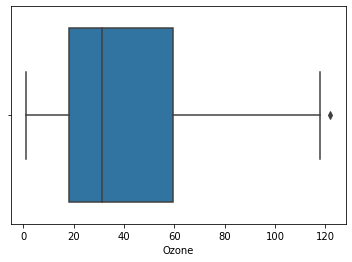

In [79]:
sns.boxplot(x="Ozone", data=air)

In [80]:
# 이상치 2개를 median으로 대체하자, 새로운 IQR 등이 정의되면서 새로운 outlier가 생길 수도 있음

In [81]:
air_2 = air.drop(out_index).reset_index(drop=True)
air_2

,Ozone,Solar.R,Wind,Temp,Month,Day,Outlier
0,41.0,190.0,7.4,67,5,1,NaN
1,36.0,118.0,8.0,72,5,2,NaN
2,12.0,149.0,12.6,74,5,3,NaN
3,18.0,313.0,11.5,62,5,4,NaN
4,NaN,NaN,14.3,56,5,5,NaN
...,...,...,...,...,...,...,...
146,30.0,193.0,6.9,70,9,26,NaN
147,NaN,145.0,13.2,77,9,27,NaN
148,14.0,191.0,14.3,75,9,28,NaN
149,18.0,131.0,8.0,76,9,29,NaN


<AxesSubplot:xlabel='Ozone'>

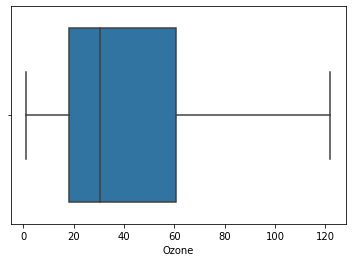

In [82]:
sns.boxplot(x="Ozone", data=air_2)

## 범주형 데이터 전처리 하기
- 연속형 변수: 수치형 변수
- 범주형 변수: 이산형 혹은 category 등
- 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법: **원핫인코딩 (one-hot-encoding)**
- 범주형 변수에 있는 원소를 columns로 변경 -> 해당 범주에 속하면 1, 아니면 0 으로 채우는 기법

    pd.get_dummies("범주형 변수")
    
    pd.get_dummies(data, columns = ["범주형1","범주형2"]

In [83]:
import pandas as pd
df = pd.read_csv("./data/빅분기_X_train.csv", encoding="cp949")
df

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


### 범주형 변수를 인코딩하기

In [84]:
df["주구매상품"].value_counts()

기타        595
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      193
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
모피/피혁      57
육류         57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
피혁잡화       40
아동         40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
대형가전        8
란제리/내의      8
식기          7
액세서리        5
침구/수예       4
보석          3
통신/컴퓨터      3
소형가전        2
남성 트랜디      2
악기          2
Name: 주구매상품, dtype: int64

In [85]:
pd.get_dummies(df["주구매상품"])

,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 원본 데이터에서 범주형 변수를 대체하기

In [86]:
df_dum = pd.get_dummies(df, columns = ["주구매상품","주구매지점"])
df_dum

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2136000,2136000,300000.0,2,1.500000,0.000000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,3197000,1639000,NaN,2,2.000000,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,16077620,4935000,NaN,18,2.444444,0.318182,16,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,29050000,24000000,NaN,2,1.500000,0.000000,85,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,1,2.000000,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,3496,29628600,7200000,6049600.0,8,1.625000,0.461538,40,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,3497,75000,75000,NaN,1,1.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3498,3498,1875000,1000000,NaN,2,1.000000,0.000000,39,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df2 = pd.read_csv("./data/빅분기_X_test.csv", encoding = "cp949")
df_dum2 = pd.get_dummies(df2, columns = ["주구매상품","주구매지점"])
df_dum2

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,3500,70900400,22000000,4050000.0,13,1.461538,0.789474,26,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3501,310533100,38558000,48034700.0,90,2.433333,0.369863,3,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3502,305264140,14825000,30521000.0,101,14.623762,0.083277,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3503,7594080,5225000,NaN,5,2.000000,0.000000,47,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3504,1795790,1411200,NaN,3,2.666667,0.125000,8,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500,23976000,NaN,8,1.750000,0.642857,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2478,5978,480000,480000,NaN,1,1.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2479,5979,260003790,25750000,NaN,19,3.736842,0.915493,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,5980,88991520,18120000,NaN,5,3.600000,0.444444,60,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#train 과 test 의 컬럼수가 다름!!!
len(df_dum.columns), len(df_dum2.columns)

(74, 73)

In [89]:
df_dum.columns[~df_dum.columns.isin(df_dum2.columns)]
#df_dum.columns.isin(df_dum2.columns)

Index(['주구매상품_소형가전'], dtype='object')

In [90]:
# 컬럼 생성해서 같게 맞추기
df_dum2["주구매상품_소형가전"] = 0
df_dum2

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,...,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점,주구매상품_소형가전
0,3500,70900400,22000000,4050000.0,13,1.461538,0.789474,26,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3501,310533100,38558000,48034700.0,90,2.433333,0.369863,3,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3502,305264140,14825000,30521000.0,101,14.623762,0.083277,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3503,7594080,5225000,NaN,5,2.000000,0.000000,47,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3504,1795790,1411200,NaN,3,2.666667,0.125000,8,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500,23976000,NaN,8,1.750000,0.642857,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2478,5978,480000,480000,NaN,1,1.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2479,5979,260003790,25750000,NaN,19,3.736842,0.915493,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,5980,88991520,18120000,NaN,5,3.600000,0.444444,60,0,0,...,0,0,0,0,0,0,0,0,0,0


## 변수 축소

### 주성분 분석 PCA
가. 주성분 분석의 개념
- 주성분 분석이란 데이터에 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 이루어진 '주성분'이라는 새로운 변수를 만들어 변수들을 요약하고 축소하는 기법

나. 파이썬을 이용한 주성분 분석
- 변수 간의 스케일 차이가 나면 스케일 큰 변수가 주성분에 영향을 많이 주기 때문에 분석 전에 변수를 표준화나 정규화시켜주는 것이 좋다. 데이터 정규화에 사용하는 함수는 StandardScaler() 이다.
- 파이썬에서 주성분 분석을 수행할 수 있는 기본적인 함수는 sklearn의 PCA 함수이다.
- pca.explained_variance_ratio_를 통해서 또는 Scree Plot으로 주성분으로 설명력을 확인 할 수 있다.
- PCA 함수는 공분산 행렬의 고유벡터를 구하는 방법을 사용한다.

### 차원을 줄여야 하는 이유

차원이 늘어나면, 1차원에서 10개 -> 2차원에서 100개 -> 3차원에서 1000개 처럼 빈 공간이 늘어나게 되고 훨씬 많은 데이터가 필요해짐
요인 회전을 통해, 고유행렬에 따라 분산이 최소화하도록 찾는 방법.
차원을 축소하는 방법

- 데이터 용량이 커질수록 불필요한 샘플 증가 현상이 일어남
- 과도한 정보를 훈련시키면 부정확하고 잘못된 모델이 탄생할 가능성이 증가함

==> 차원 축소로 해결 가능함

In [91]:
import pandas as pd
iris_data = pd.read_csv("./data/iris.csv")
features = ["sepal length","sepal width","petal length","petal width"]
x = iris_data.loc[:,features].values

#수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [92]:
from sklearn.decomposition import PCA

#Scree plot 으로 주성분 개수를 정하는 방법
pca = PCA(n_components=4)
pca_fit = pca.fit(x)

In [93]:
#분산 설명력의 비율
pca_fit.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [94]:
print("\n ======= PCA Result Summary =======")
print("\n 고유 값: \n", pca.singular_values_)
print("\n 분산 설명력: \n", pca.explained_variance_ratio_)


 ======= PCA Result Summary =======

 고유 값: 
 [20.89551896 11.75513248  4.7013819   1.75816839]

 분산 설명력: 
 [0.72770452 0.23030523 0.03683832 0.00515193]


In [95]:
# 4개의 축을 요인회전 시켜서 각 4개의 축마다 설명력을 비교한 것임
# 상위 2개를 선택하면 약 95% 설명이 가능함

In [96]:
features

['sepal length', 'sepal width', 'petal length', 'petal width']

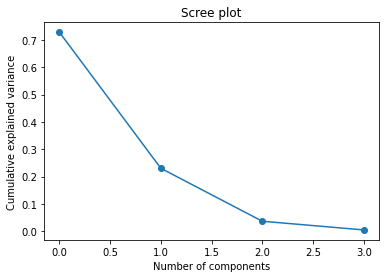

In [97]:
# Scree Plot
import matplotlib.pyplot as plt
plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [98]:
# scree plot을 보면 2개 성분 이후부터 기울기가 급격히 완만해짐 따라서 2개로 선택

In [99]:
pca = PCA(n_components = 2) # PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = pca.fit_transform(x) ## 주성분 2개 객체에 할당 (4개의 변수가 2개의 변수로 축소됨)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component1", "principal component2"])
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [100]:
principalDf

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [101]:
## 주성분 점수 확인

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


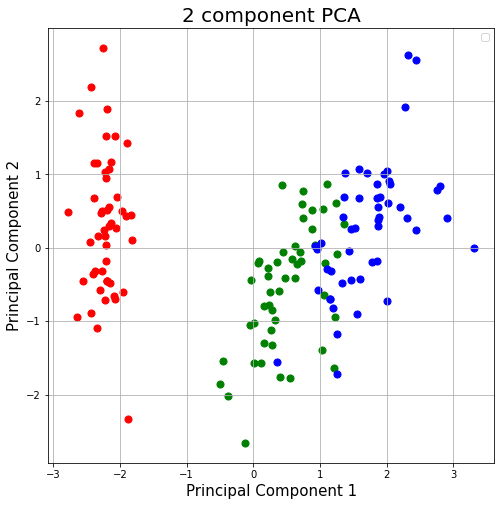

In [102]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_data['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1']
              , principalDf.loc[indicesToKeep, 'principal component2']
              , c= color
              , s = 50)
ax.legend()
ax.grid()

In [103]:
## PCA를 쓰면 빈공간이 사라지고 학습력이 올라간다